# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
# Import necessary libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report, recall_score

from sklearn import metrics

from sklearn.model_selection import GridSearchCV


In [2]:
# Import Dataset

df = pd.read_csv("ExtraaLearn.csv")

## Data Overview

- Observations
- Sanity checks

In [3]:
# View the first five rows of the dataset

df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [4]:
# View the last five rows of the dataset

df.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [5]:
# View the data type and size information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [6]:
# Check for duplicates in the dataset

df.duplicated().value_counts()

False    4612
Name: count, dtype: int64

In [7]:
# Count the unique values in the dataset

num_count = df.nunique()
print(num_count)

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64


In [8]:
# Check for null values in the dataset

df.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

### Observations:

1. There are 4,612 datapoints in the dataset.
2. The ID data is just an index without containing meaninful information regarding to the dataset. Hence, it is safe to not use this column in our analysis, and it is safe to remove it.
3. The status data here is a target variable where the data only consist of 2 choices, which are 0 and 1. It is used to indicate whether the lead customer is converted to a paid customer or not.
4. Without the ID column, we have 13 features in the dataset.
5. From the 13 features, 9 of features are categorical data, while 3 of them are integers, and 1 float data.
6. There are no missing values in the dataset.
7. The columns that consist of unique values that are less than and equal to 3 are categorical values, which leave the rest of the columns to be continuous data.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [9]:
# Show the numerical summary statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


### Observations:

1. The average age of the potential customers is 46 years old, with the minimum age of 18 and the maximum age of 63.
2. The verage website visits is 3 with the maximum website visit of 30 times, and 0 as the minimum website visit.
3. The average time spent on the website is 724 seconds while the minimum is also 0, and the maximum time is 2,537 seconds.
4. Lastly, the page views per visit has an average of 3 page views. Although, there is a big difference from the 75th percentile and the maximum value of 18 pages visited by the leads. There might be outliers in this dataset.
5. Status has only two outcomes, which is either 0 or 1 depending on whether they converted into a paid customer or not. The average of 0.30 is higher than the 50th percentile which is 0, which means that the data is skewed to the right. The standard deviation of about 0.46 tells us that the data is dispersed.

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [10]:
# Dropping ID column

df.drop(["ID"], axis = 1, inplace = True)

In [11]:
# Create a list of categorical columns

cat_col = list(df.select_dtypes("object").columns)

print(cat_col)

['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']


In [12]:
# Create a list of numerical columns

num_col = list(df.select_dtypes("number").columns)

print(num_col)

['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit', 'status']


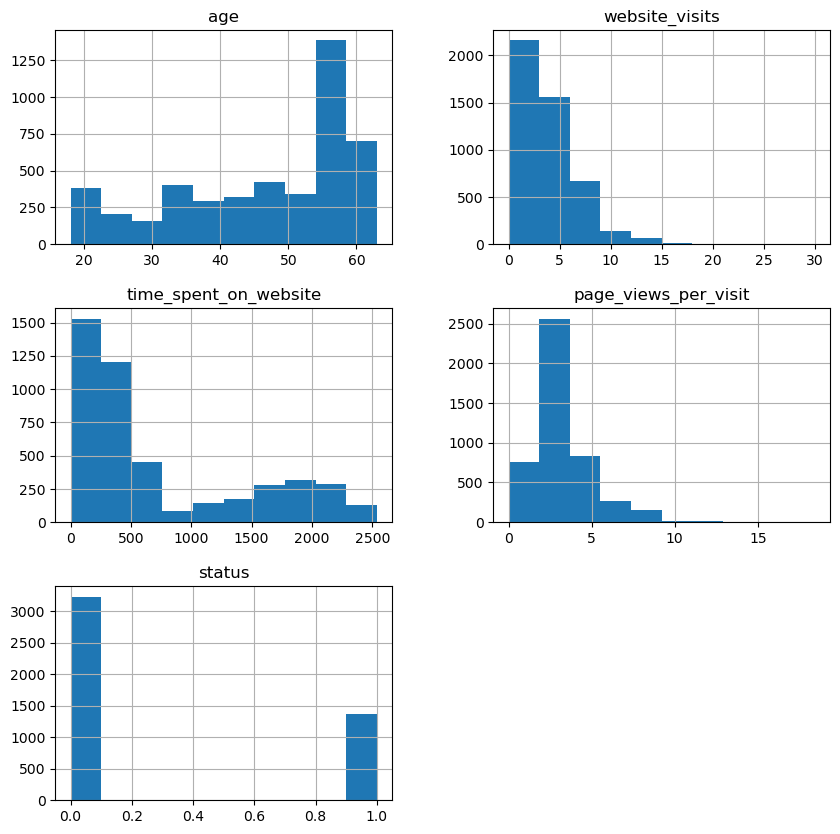

In [13]:
# Create histograms based on the numerical columns

df[num_col].hist(figsize=(10,10))
plt.show()

### Observations:

From the graphs above, the highest number of leads comes from the age group of 54 to 58 (with the amount of 1390). The leads around age 60 have the second highest frequency of 700.


Most people visit the website less than 5 times. The number of visits more than 15 can be viewed as outliers.

Although most of the people spent less than 750 seconds on the website, the more time people spend on the website cannot be considered as outliers.

People spend about 2 to 4 page views per visit. Any views per visit that are more than 10 can be viewed as outliers.

In [14]:
# Summary for categorical columns

# Print the number of count of each unique values in each column of the dataset

for column in cat_col:
    print(df[column].value_counts())
    
# Draw a long broken line to separate the columns for better visual

    print("-" * 50)

current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
--------------------------------------------------
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
--------------------------------------------------
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
--------------------------------------------------
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
--------------------------------------------------
print_media_type1
No     4115
Yes     497
Name: count, dtype: int64
--------------------------------------------------
print_media_type2
No     4379
Yes     233
Name: count, dtype: int64
--------------------------------------------------
digital_media
No     4085
Yes     527
Name: count, dtype: int64
--------------------------------------------------
educational_channels
No     3907
Yes     705
Name

In [15]:
# Separating numerical data and categorical data

numerical_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

In [16]:
#View the first 5 rows of the numerical data

numerical_data.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
0,57,7,1639,1.861,1
1,56,2,83,0.320,0
2,52,3,330,0.074,0
3,53,4,464,2.057,1
4,23,4,600,16.914,0


In [17]:
#View the first 5 rows of the categorical data

categorical_data.head()

,current_occupation,first_interaction,profile_completed,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral
0,Unemployed,Website,High,Website Activity,Yes,No,Yes,No,No
1,Professional,Mobile App,Medium,Website Activity,No,No,No,Yes,No
2,Professional,Website,Medium,Website Activity,No,No,Yes,No,No
3,Unemployed,Website,High,Website Activity,No,No,No,No,No
4,Student,Website,High,Email Activity,No,No,No,No,No


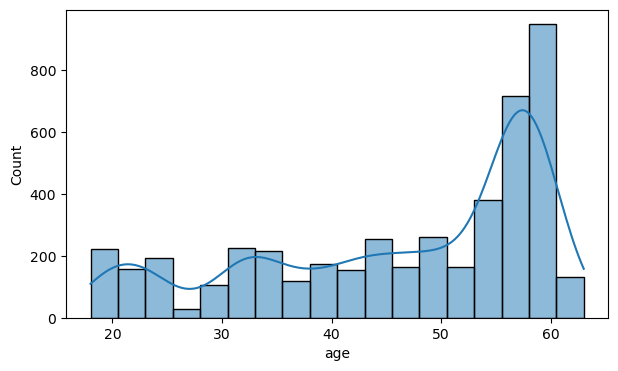

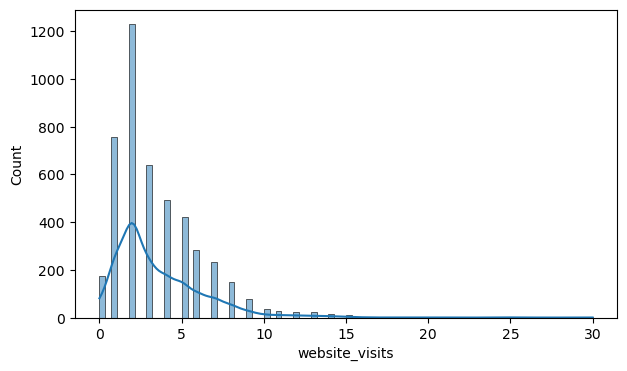

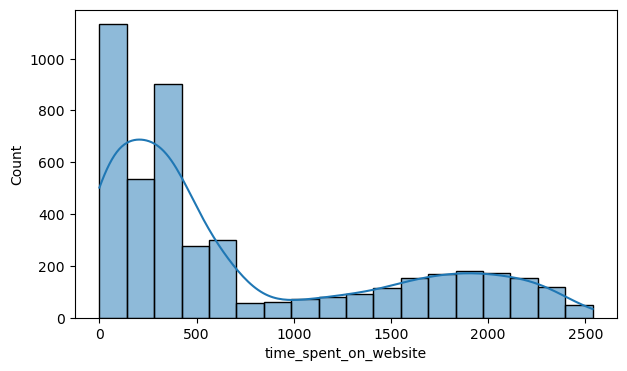

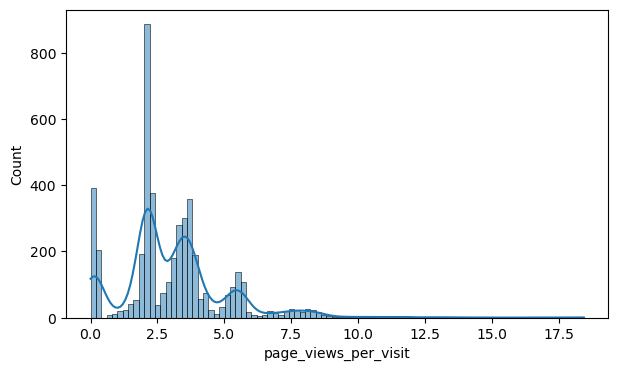

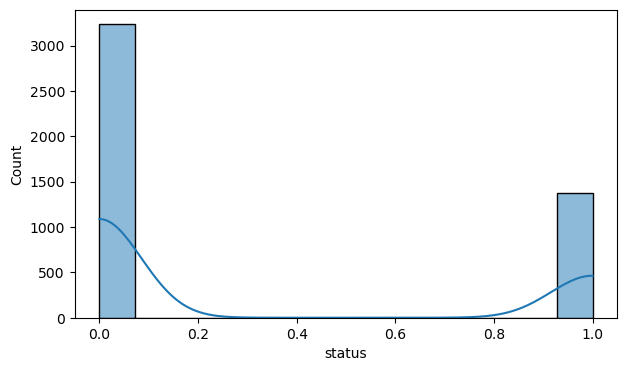

In [18]:
#Analyzing numerical data using histogram plot

for i in numerical_data.columns: 
    plt.figure(figsize = (7,4)) 
    sns.histplot(data = numerical_data , x = i, kde = True)
    plt.show()

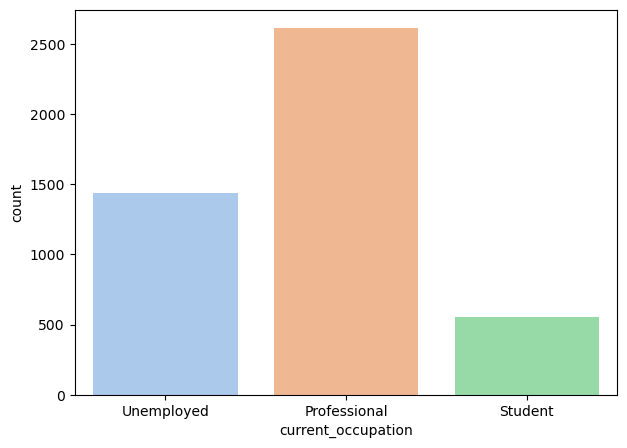

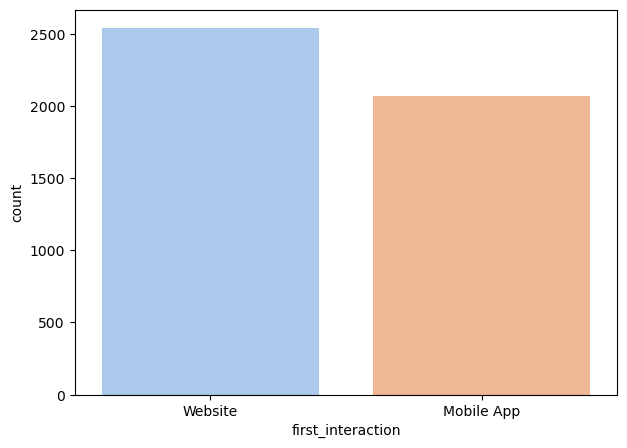

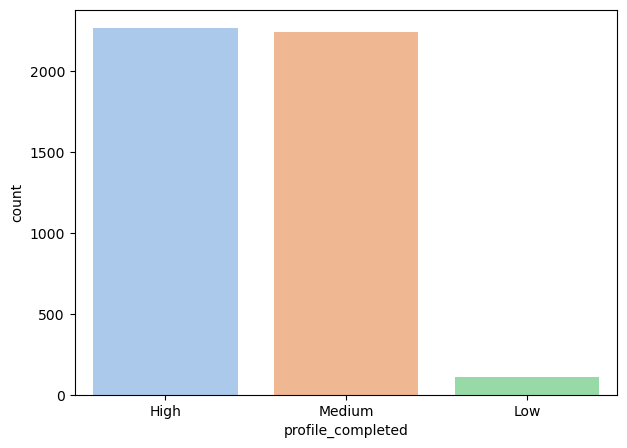

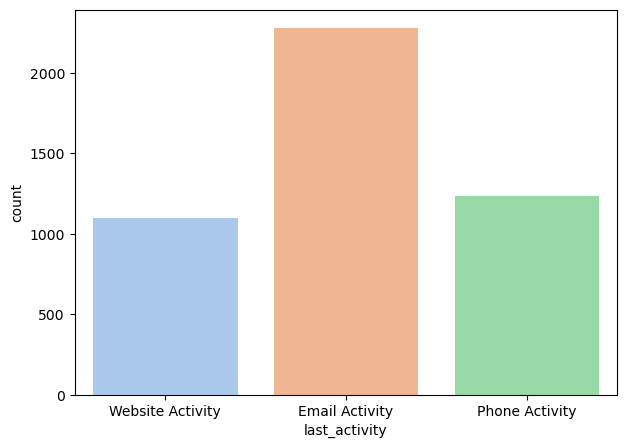

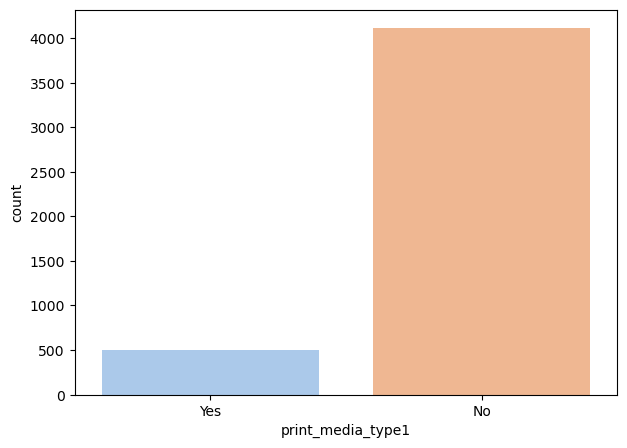

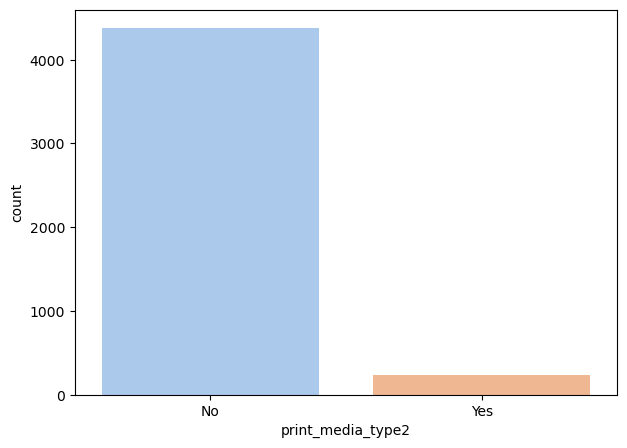

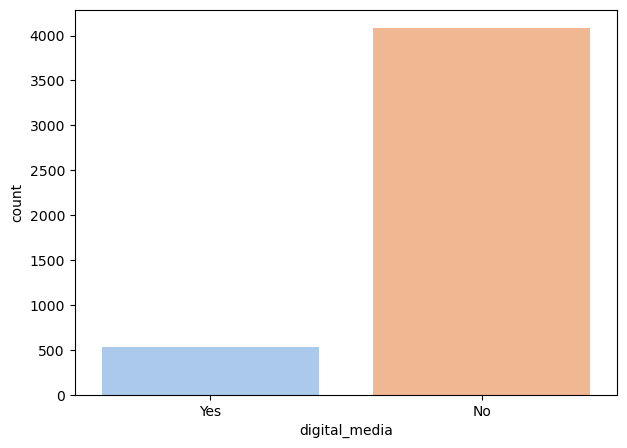

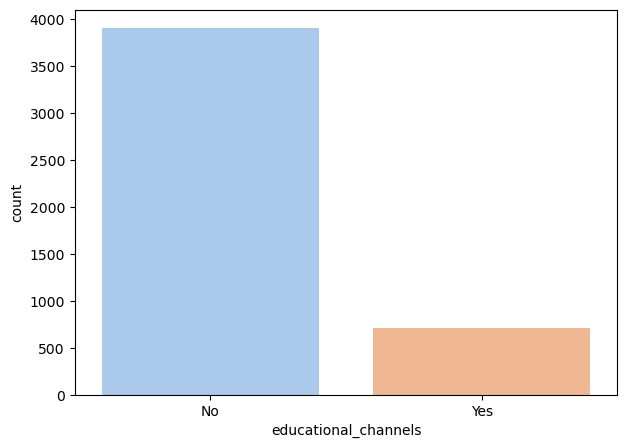

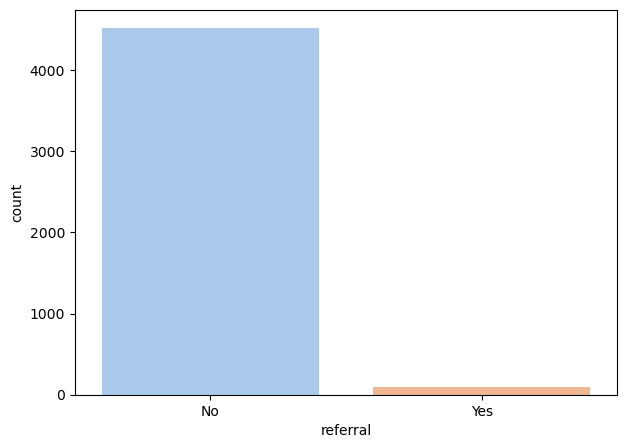

In [19]:
# Analyzing the categorical faetures using countplot

for i in categorical_data.columns: 
    plt.figure(figsize = (7, 5))
    sns.countplot(x = i ,data = categorical_data, palette = 'pastel')
    plt.show()

## Question 1

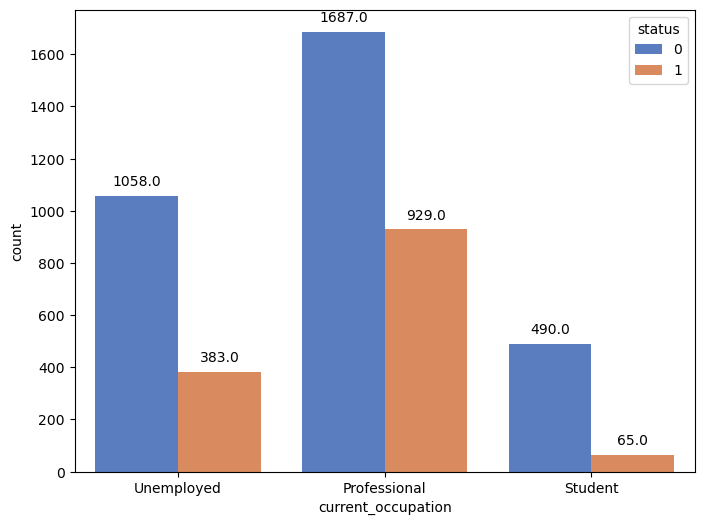

In [20]:
# Question 1: Find out how current occupation affects lead status

plt.figure(figsize = (8, 6))

q1 = sns.countplot(x = 'current_occupation', hue = 'status', data = df, palette = 'muted')

for a in q1.patches:
    q1.annotate(f'{a.get_height()}', (a.get_x() + a.get_width() / 2., a.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [21]:
# View statistical summary related to Question 1

df.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.0,49.347477,9.890744,25.0,42.0,54.0,57.0,60.0
Student,555.0,21.144144,2.001114,18.0,19.0,21.0,23.0,25.0
Unemployed,1441.0,50.140180,9.999503,32.0,42.0,54.0,58.0,63.0


## Question 2

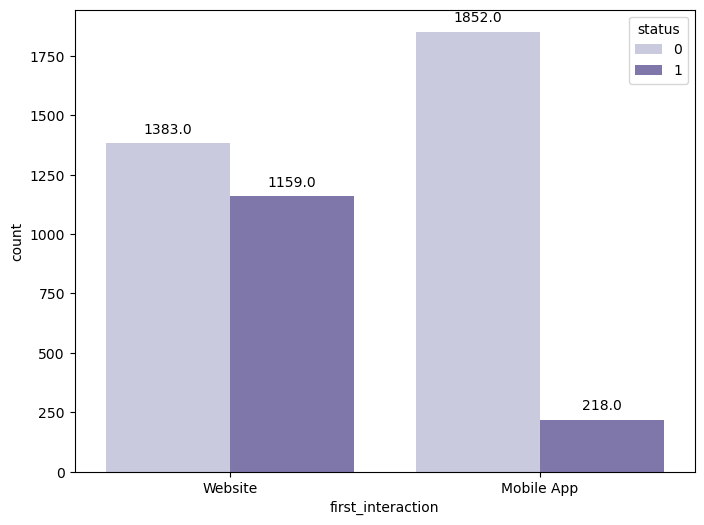

In [22]:
#Question 2: Do the first channels of interaction have an impact on the lead status?

plt.figure(figsize = (8, 6))

q2 = sns.countplot(x = 'first_interaction', hue = 'status', data = df, palette = 'Purples')

for b in q2.patches:
    q2.annotate(f'{b.get_height()}', (b.get_x() + b.get_width() / 2., b.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [23]:
# View statistical summary related to Question 2

df.groupby(["first_interaction"])["current_occupation"].describe()

,count,unique,top,freq
first_interaction,,,,
Mobile App,2070,3,Professional,1191
Website,2542,3,Professional,1425


## Question 3

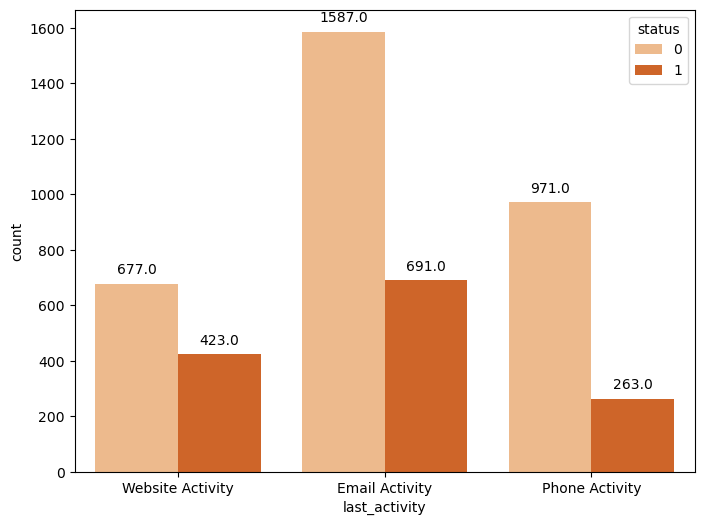

In [24]:
#Question 3: Which way of interaction works best?

plt.figure(figsize = (8, 6))

q3 = sns.countplot(x = 'last_activity', hue = 'status', data = df, palette = 'Oranges')

for c in q3.patches:
    q3.annotate(f'{c.get_height()}', (c.get_x() + c.get_width() / 2., c.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

## Question 4

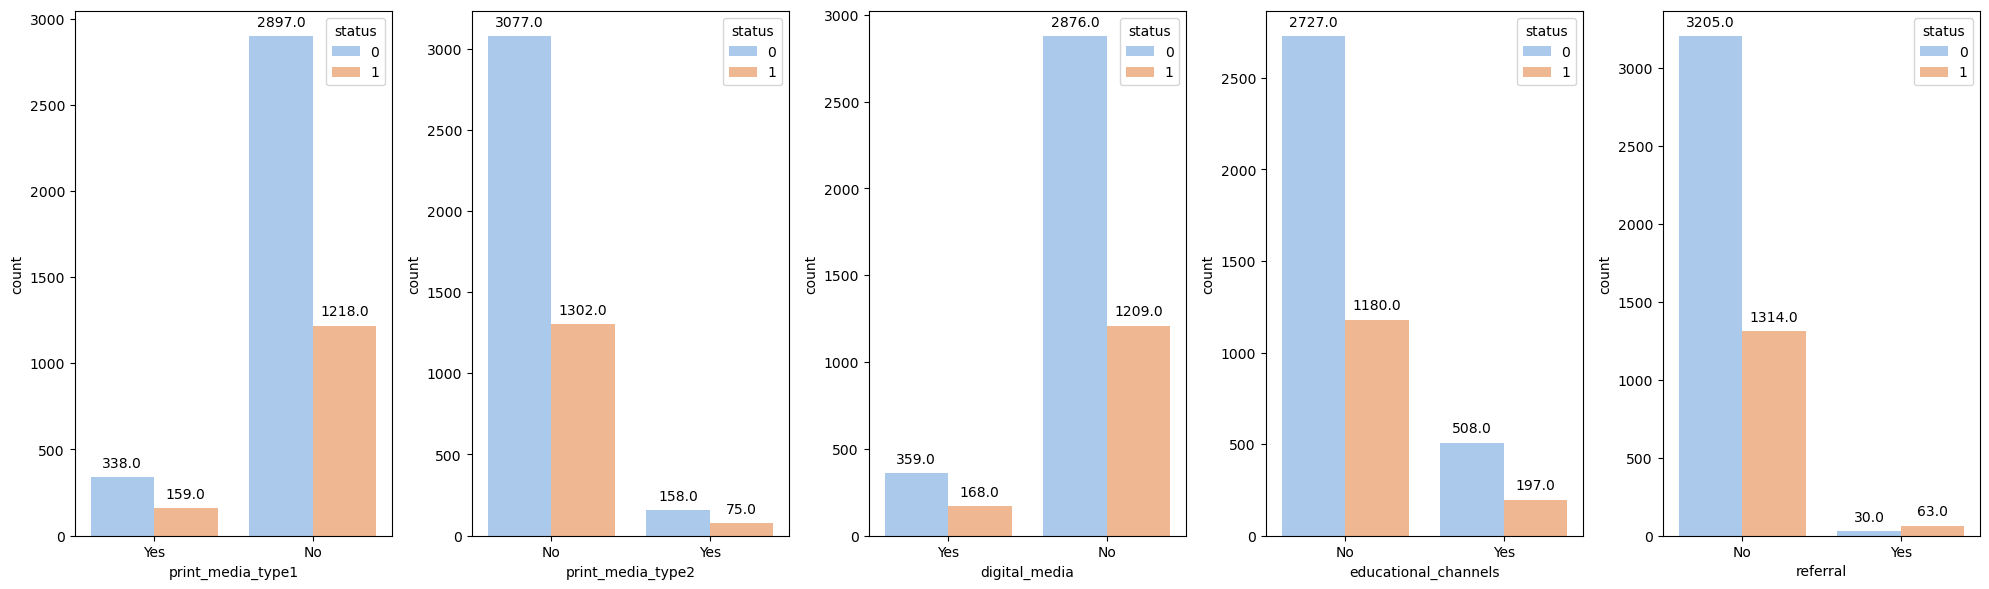

In [25]:
#Question 4: Which of these channels have the highest lead conversion rate?

cat_cols = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

# Set up subplots

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6))

# Flatten the axes for easy iteration

axes = axes.flatten()

# Loop through each categorical column and create a countplot

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, hue='status', data=df, palette='pastel', ax=axes[i])
    
    # Add numerical values on top of the bars
    
    for d in axes[i].patches:
        axes[i].annotate(f'{d.get_height()}', (d.get_x() + d.get_width() / 2., d.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust layout

plt.tight_layout()
plt.show()

## Question 5

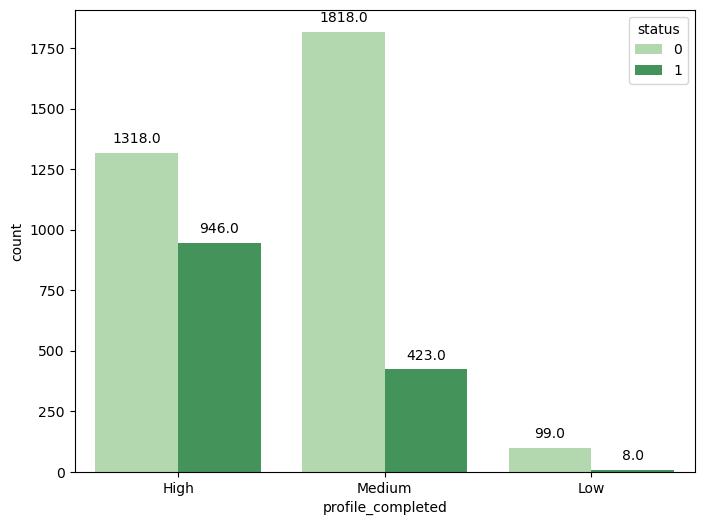

In [26]:
# Question 5: Does having more details about a prospect increase the chances of conversion?

plt.figure(figsize = (8, 6))

q5 = sns.countplot(x = 'profile_completed', hue = 'status', data = df, palette = 'Greens')

for e in q5.patches:
    q5.annotate(f'{e.get_height()}', (e.get_x() + e.get_width() / 2., e.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

<Axes: >

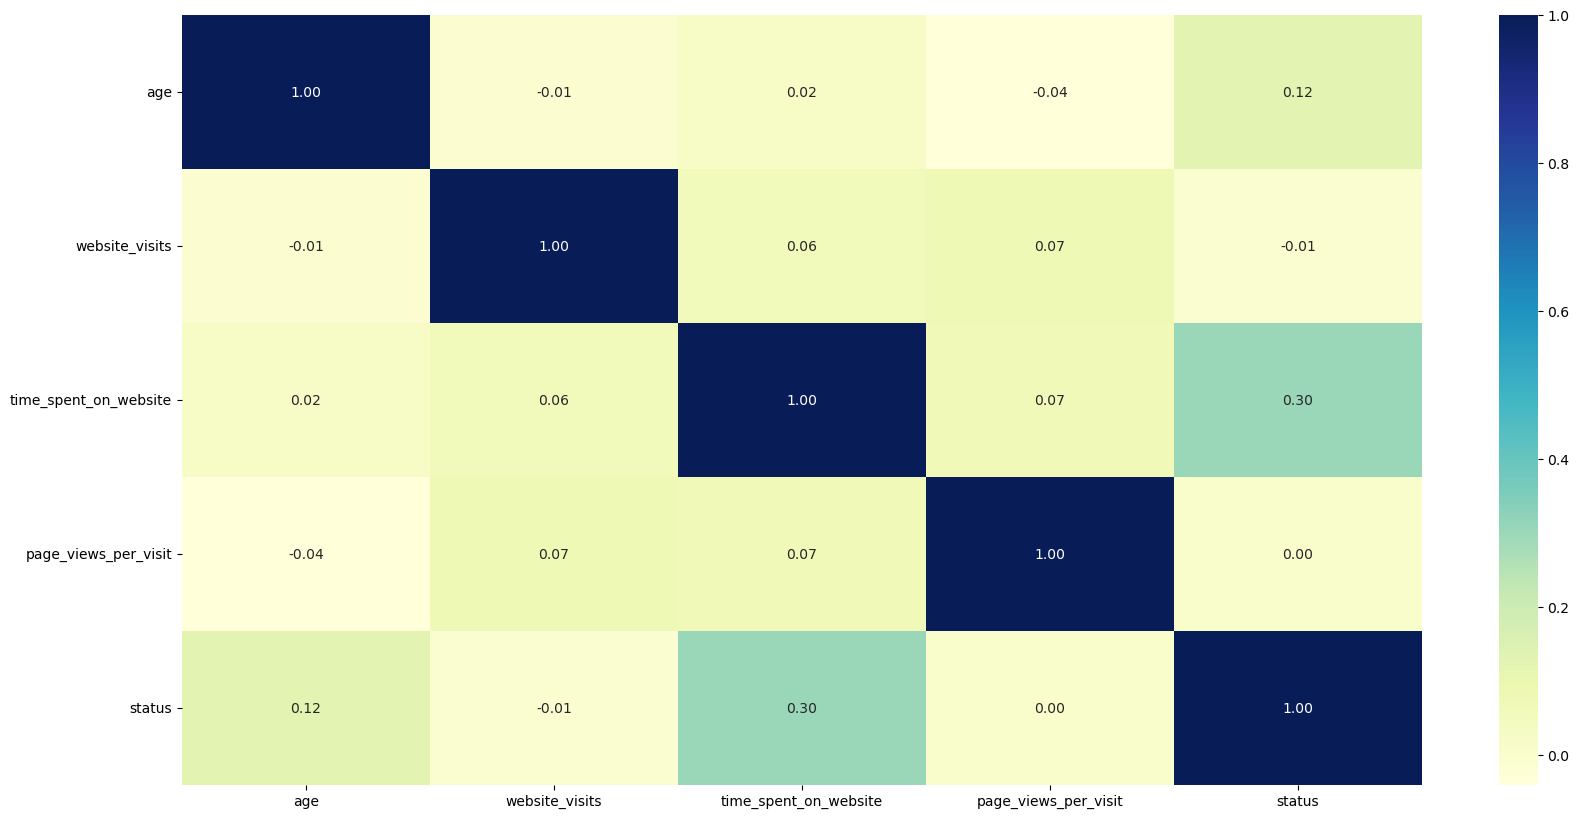

In [27]:
# Creating correlation plot between the numerical variables

plt.figure(figsize=(20,10))

sns.heatmap(df[num_col].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

### Observations:

The correlations between the numerical features are considered low.

## EDA OBSERVATION ANALYSIS

## Observations:

#### Answers to the above EDA related questions:

1. Most of the leads' current occupations are professionals. 56.72% of the leads are professionals, 31.25% are unemployeed, and 12.03% are students. Leads that are converted into paying customers (labeled as 1) are mostly from professionals and unemployed. The average age of the professionals is 49 and similarly, the average age of the unemployed is 50. Courses might be attractive for professionals as some financials might be covered by their organizations, while students with the average age of 21 might not have the capability to afford the courses. Thus, it is not a surprise to see that professionals have the highest conversion rate from leads to sales.

2. The website first interaction matters more compared to the Mobile App. It has a higher conversion rate as well. The number of leads mostly come from people with the current occupation of professionals.

3. The interaction that works best is via Website with the 38.45% Interaction via Email has a conversion rate of about 30.33%, and interaction via phone only has a conversion rate of about 21.31%.

4. The channel that has the highest leads comes from referrals, which have the highest conversion rate (67.74%) comparing to the rest of the sources as it has the highest conversion rate.

5. The leads who go through completing their profile has a highest tendency in converting themselves to paying customers. They have more intentions in purchasing courses, hence why they complete their profiles.


## Machine Learning Modeling Preparation

In [28]:
# Separate target variable from the other variables

X=df.drop(columns='status')
Y=df['status'] 

# Convert strings to integers
X = pd.get_dummies(X, drop_first=True) 

# Split the data in 70:30 ratio --> train:test)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [29]:
# Convert integer data type columns to float data type columns

for column in ['age', 'website_visits', 'time_spent_on_website']:
    X_train[column]=X_train[column].astype('float')
    X_test[column]=X_test[column].astype('float')

In [30]:
# Check that both train and test data sets have no null values

print('Train Set:')
print('-'*10)
print(X_train.isna().sum())

#Separator to get a better visual
print('-'*30)
print('')
print('')

print('Test Set:')
print('-'*10)
print(X_test.isna().sum())

Train Set:
----------
age                               0
website_visits                    0
time_spent_on_website             0
page_views_per_visit              0
current_occupation_Student        0
current_occupation_Unemployed     0
first_interaction_Website         0
profile_completed_Low             0
profile_completed_Medium          0
last_activity_Phone Activity      0
last_activity_Website Activity    0
print_media_type1_Yes             0
print_media_type2_Yes             0
digital_media_Yes                 0
educational_channels_Yes          0
referral_Yes                      0
dtype: int64
------------------------------


Test Set:
----------
age                               0
website_visits                    0
time_spent_on_website             0
page_views_per_visit              0
current_occupation_Student        0
current_occupation_Unemployed     0
first_interaction_Website         0
profile_completed_Low             0
profile_completed_Medium          0
last_activi

In [31]:
# Show more information regarding the train and test data sets

print("Shape of the training set: ", X_train.shape)   

print("Shape of the test set: ", X_test.shape)

print('')
print('')

print("Percentage of classes in the training set:")

print(y_train.value_counts(normalize = True))

print('')
print('')

print("Percentage of classes in the test set:")

print(y_test.value_counts(normalize = True))

Shape of the training set:  (3228, 16)
Shape of the test set:  (1384, 16)


Percentage of classes in the training set:
status
0    0.704151
1    0.295849
Name: proportion, dtype: float64


Percentage of classes in the test set:
status
0    0.695087
1    0.304913
Name: proportion, dtype: float64


## Building a Decision Tree Model

In [32]:
# Building and fitting the decision tree model

dt = DecisionTreeClassifier(random_state = 5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [33]:
# Create metric function to print the classification report and confusion matrix

def metricscore(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



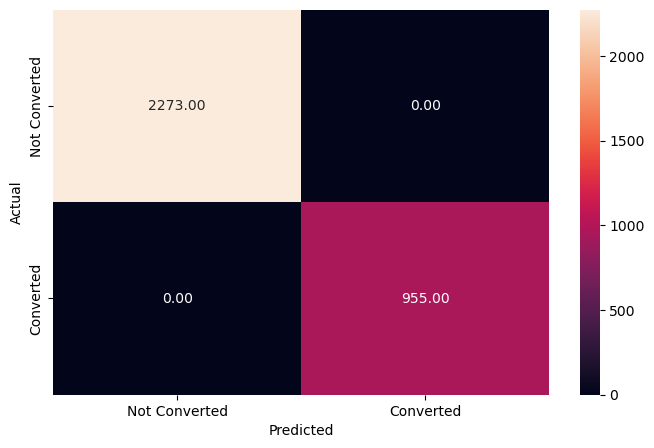

In [34]:
# Check the performance of the training dataset

y_train_pred_dt = dt.predict(X_train)
metricscore(y_train, y_train_pred_dt)

### Observations:

The model is too overfitted in training the data.

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       962
           1       0.70      0.69      0.70       422

    accuracy                           0.82      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.82      0.82      0.82      1384



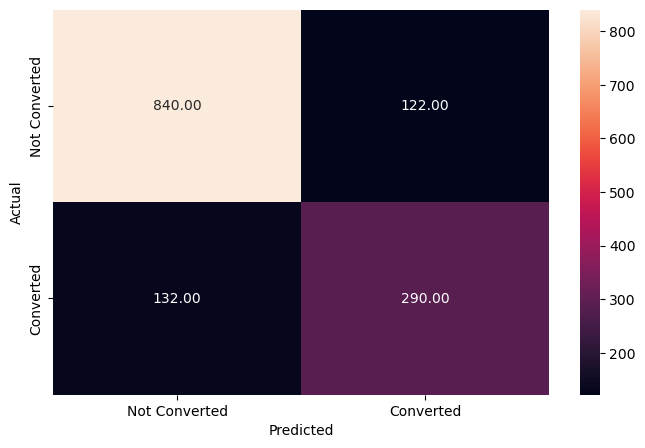

In [35]:
# Check the performance of the test dataset

y_test_pred_dt = dt.predict(X_test)
metricscore(y_test, y_test_pred_dt)

In [36]:
# Show Accuracy (round in 2 decimal places) of Decision Tree

accuracy = metrics.accuracy_score(y_test, y_test_pred_dt) * 100

print("Accuracy: {:.2f}%".format(accuracy))

Accuracy: 81.65%


In [37]:
# Find the Importance of Features of the Decision Tree

print (pd.DataFrame(dt.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
time_spent_on_website           0.272126
first_interaction_Website       0.146368
page_views_per_visit            0.137775
profile_completed_Medium        0.121768
age                             0.086457
website_visits                  0.050361
current_occupation_Unemployed   0.039138
last_activity_Phone Activity    0.035904
current_occupation_Student      0.033791
profile_completed_Low           0.019854
last_activity_Website Activity  0.019154
referral_Yes                    0.008163
digital_media_Yes               0.008106
educational_channels_Yes        0.008051
print_media_type1_Yes           0.006858
print_media_type2_Yes           0.006126


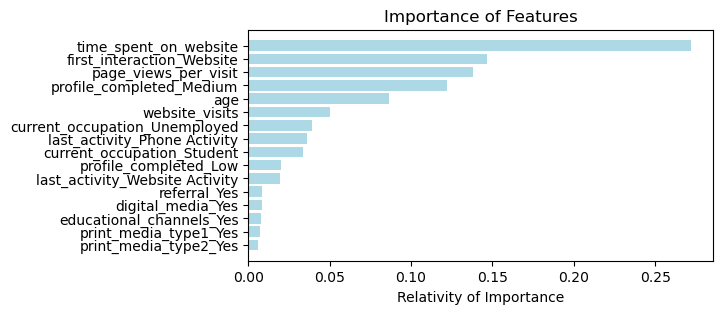

In [38]:
# Plot the Importance of Features of the Decision Tree

features = list(X.columns)
importances = dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (6,3))
plt.title('Importance of Features')
plt.barh(range(len(indices)), importances[indices], color = 'lightblue', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relativity of Importance')
plt.show()

### Tuning Decision Tree Model

In [39]:
# Classifier Type of Tuned Decision Tree

d_tree_tuned = DecisionTreeClassifier(random_state = 5, class_weight = {0: 0.3, 1: 0.7})

# Grid of Parameters

parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of Scoring used to compare parameter combinations - recall score for class 1

scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search

grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5, n_jobs = 1)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the combination of the parameters

d_tree_tuned = grid_obj.best_estimator_

# Fit the algorithm to the data

d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=5)

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



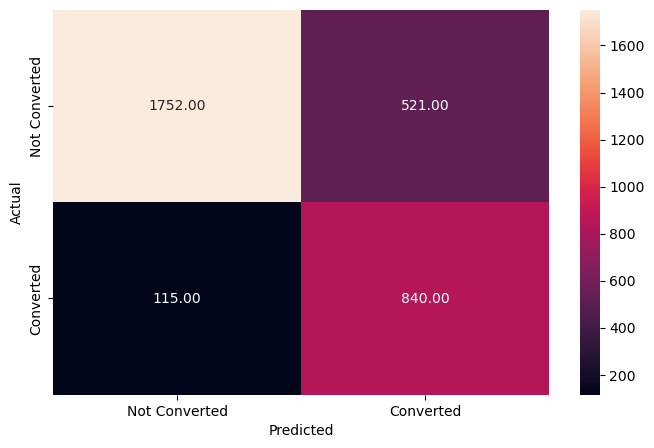

In [40]:
# Check the performance of the train data after tuned

y_pred_train_tuned = d_tree_tuned.predict(X_train)
metricscore(y_train, y_pred_train_tuned)

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



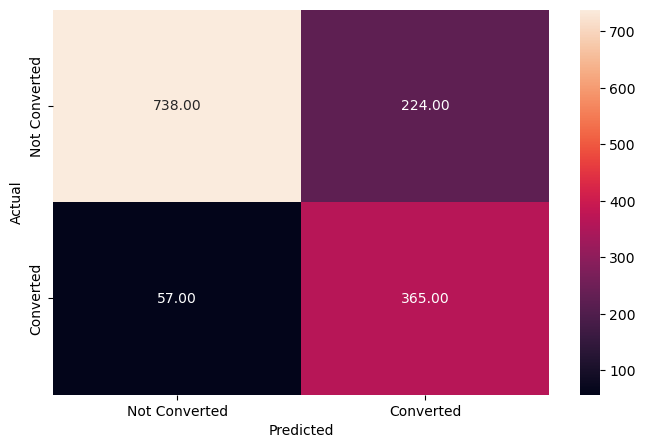

In [41]:
# Check performance of the test data after tuned

y_pred_test_tuned = d_tree_tuned.predict(X_test)
metricscore(y_test, y_pred_test_tuned)

In [42]:
# Show Accuracy of Decision Tree Classifier After Tuned

accuracy_dt_tuned = metrics.accuracy_score(y_test,y_pred_test_tuned)*100

print("Accuracy: {:.2f}%".format(accuracy_dt_tuned))

Accuracy: 79.70%


In [43]:
# Find the Importance of the Features of the Decision Tree After Tuned

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                                Importance
time_spent_on_website             0.348142
first_interaction_Website         0.327181
profile_completed_Medium          0.239274
age                               0.063893
last_activity_Website Activity    0.021511
website_visits                    0.000000
page_views_per_visit              0.000000
current_occupation_Student        0.000000
current_occupation_Unemployed     0.000000
profile_completed_Low             0.000000
last_activity_Phone Activity      0.000000
print_media_type1_Yes             0.000000
print_media_type2_Yes             0.000000
digital_media_Yes                 0.000000
educational_channels_Yes          0.000000
referral_Yes                      0.000000


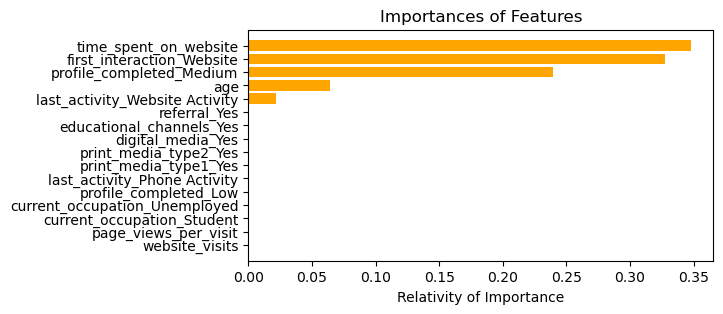

In [44]:
# Plot the Importance of the Features of the Decision Tree After Tuned

features = list(X.columns)
importances = d_tree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (6, 3))
plt.title('Importances of Features')
plt.barh(range(len(indices)), importances[indices], color = 'orange', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relativity of Importance')
plt.show()

### Observations:

After the decision tree is tuned, the result of the accuracy of the model slightly lowers down from 81.65% to 79.70%. Thus, tuning might not be a quite good idea to do.

## Do we need to prune the tree?

In [45]:
# Define the features needed to prune the tree

X_pruned = df[['time_spent_on_website', 'first_interaction', 'profile_completed', 
               'last_activity', 'age']]

In [46]:
# Convert strings to integers

X_pruned = pd.get_dummies(X_pruned, drop_first=True) 

# Split the data to 70:30 ratio for the train and test data

X_train_pruned, X_test_pruned, y_train_pruned, y_test_pruned = train_test_split(X_pruned, Y, test_size=0.30, random_state=5)

# Build the decision tree model for the pruned decision tree

dt_pruned = DecisionTreeClassifier(random_state = 5)
dt_pruned.fit(X_train_pruned, y_train_pruned)

DecisionTreeClassifier(random_state=5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2296
           1       1.00      1.00      1.00       932

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



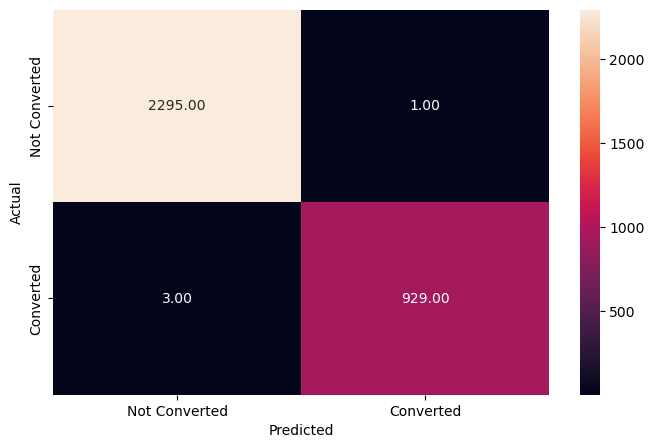

In [47]:
# Check the performance of the train dataset after pruned

y_train_pruned_dt = dt_pruned.predict(X_train_pruned)

metricscore(y_train_pruned, y_train_pruned_dt)

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       939
           1       0.67      0.68      0.67       445

    accuracy                           0.79      1384
   macro avg       0.76      0.76      0.76      1384
weighted avg       0.79      0.79      0.79      1384



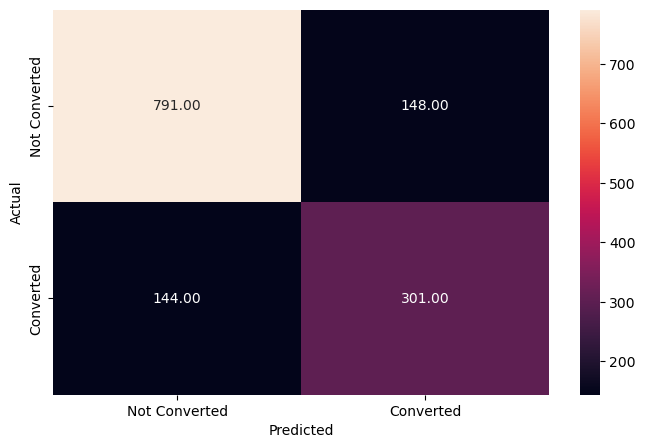

In [48]:
# Check the performance on the test dataset after pruned

y_test_pruned_dt = dt_pruned.predict(X_test_pruned)

metricscore(y_test_pruned, y_test_pruned_dt)

In [49]:
# Show Accuracy of Decision Tree Classifier After Pruned

accuracy_dt_pruned = metrics.accuracy_score(y_test_pruned, y_test_pruned_dt) * 100

print("Accuracy: {:.2f}%".format(accuracy_dt_pruned))

Accuracy: 78.90%


### Observations:

Thus, it can be concluded that with testing only with 5 features and 1 target from the dataset, the performance of the test set is not perfoming any better. Hence, pruning is not quite a good idea. The accuracy of the decision tree modeling before it was tuned, decreased from 81.65% to 78.90% after it was pruned.

## Building a Random Forest Model

In [50]:
# Split the data in 70:30 ratio --> train:test)

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, Y, test_size=0.30, random_state=1)

In [51]:
# Convert integer data type columns to float data type columns

for column in ['age', 'website_visits', 'time_spent_on_website']:
    X_train_rf[column]=X_train_rf[column].astype('float')
    X_test_rf[column]=X_test_rf[column].astype('float')

In [52]:
# Fitting the Random Forest Classifier

rf =  RandomForestClassifier(class_weight = {0: 0.20, 1: 0.80},random_state = 8)
rf.fit(X_train_rf,y_train_rf)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=8)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



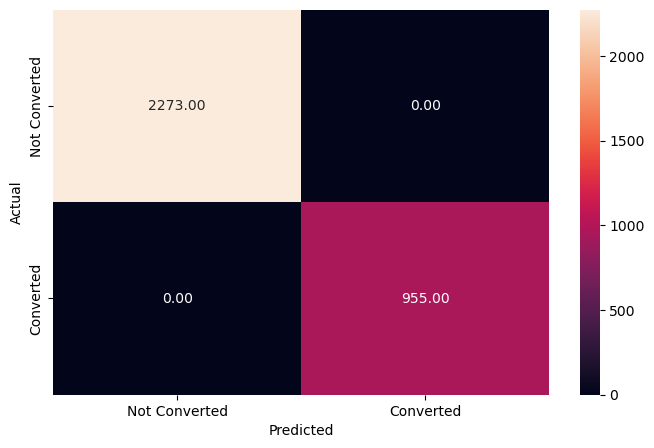

In [53]:
# Check performance of the train data

y_pred_train_rf = rf.predict(X_train_rf)
metricscore(y_train_rf, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       962
           1       0.80      0.69      0.74       422

    accuracy                           0.85      1384
   macro avg       0.84      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384



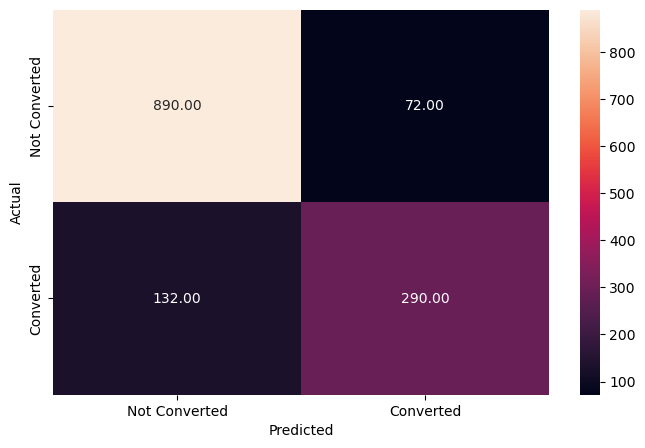

In [54]:
# Check performance of the test data

y_pred_test_rf = rf.predict(X_test_rf)
metricscore(y_test_rf, y_pred_test_rf)

In [55]:
# Show Accuracy of Random Forest Classifier

accuracy_rf = metrics.accuracy_score(y_test_rf,y_pred_test_rf)*100

print("Accuracy: {:.2f}%".format(accuracy_rf))

Accuracy: 85.26%


In [56]:
# Find the Importance of Features

print (pd.DataFrame(rf.feature_importances_, columns = ["Importance"], index = X_train_rf.columns).sort_values(by = 'Importance', ascending = False))

                                Importance
time_spent_on_website             0.284641
first_interaction_Website         0.185103
page_views_per_visit              0.113043
profile_completed_Medium          0.103758
age                               0.101423
website_visits                    0.063511
last_activity_Phone Activity      0.030538
last_activity_Website Activity    0.020989
current_occupation_Unemployed     0.020404
current_occupation_Student        0.019603
profile_completed_Low             0.013334
print_media_type1_Yes             0.010649
educational_channels_Yes          0.010460
digital_media_Yes                 0.010393
print_media_type2_Yes             0.006267
referral_Yes                      0.005883


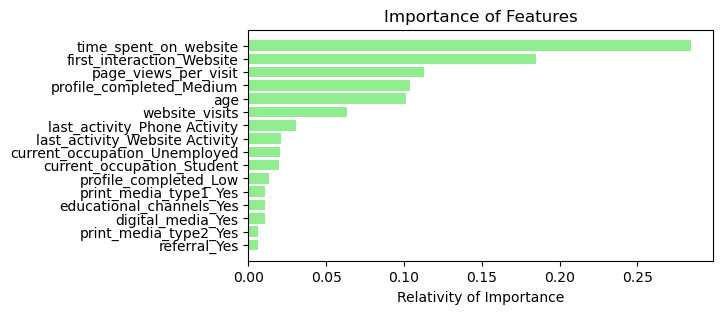

In [57]:
# Plot the Importance of Features

features = list(X.columns)
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (6,3))
plt.title('Importance of Features')
plt.barh(range(len(indices)), importances[indices], color = 'lightgreen', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relativity of Importance')
plt.show()

### Observations: 

1. Even with overfitting, Random Forest Classifier performs better than Decision Tree Classifier. The accuracy of Random Forest Classifier before tuning and pruning is 85.26%, whilst Decision Tree Classifier's accuracy is only 81.65% before tuning and pruning.



2. Similar to the decision tree, the random forest model's training dataset is also most likely overfitting.

### Tuning Random Forest Model

In [58]:
# Choose the type of classifier 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 8)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 125],
    "max_depth": [9, 10],
    "min_samples_leaf": [10, 15],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.2, 1: 0.8}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj_rf = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5, n_jobs=1)

grid_obj_rf = grid_obj_rf.fit(X_train_rf, y_train_rf)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj_rf.best_estimator_

In [59]:
# Fitting the algorithm of the train data after tuned

rf_estimator_tuned.fit(X_train_rf, y_train_rf)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=9, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=15, n_estimators=125, random_state=8)

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      2273
           1       0.67      0.92      0.78       955

    accuracy                           0.84      3228
   macro avg       0.82      0.87      0.83      3228
weighted avg       0.88      0.84      0.85      3228



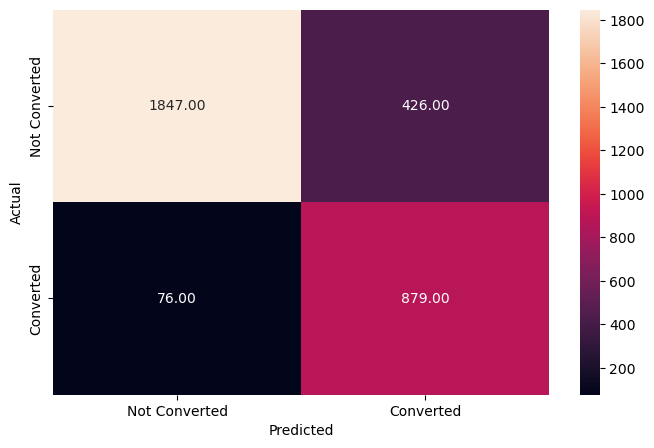

In [60]:
# Check the performance of the train dataset after tuned

y_train_pred_rf = rf_estimator_tuned.predict(X_train_rf)
metricscore(y_train_rf, y_train_pred_rf)

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       962
           1       0.67      0.87      0.76       422

    accuracy                           0.83      1384
   macro avg       0.80      0.84      0.81      1384
weighted avg       0.85      0.83      0.84      1384



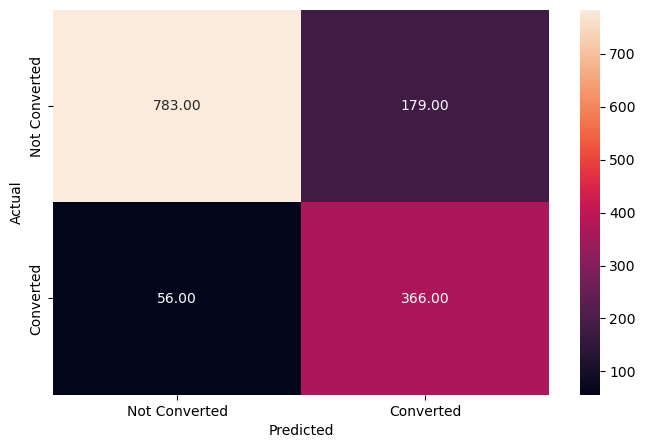

In [61]:
# Check the performance of the test dataset after tuned

y_test_pred_rf = rf_estimator_tuned.predict(X_test_rf)
metricscore(y_test_rf, y_test_pred_rf)

In [62]:
# Show Accuracy of Random Forest Classifier After Tuned

accuracy_rf_tuned = metrics.accuracy_score(y_test_rf,y_test_pred_rf)*100

print("Accuracy: {:.2f}%".format(accuracy_rf_tuned))

Accuracy: 83.02%


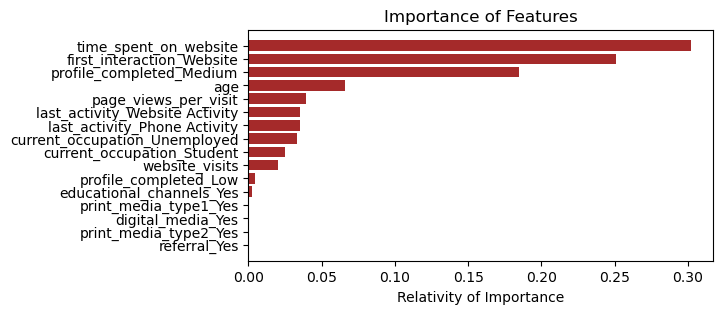

In [63]:
# Plot the Importance of Features

features = list(X.columns)
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (6,3))
plt.title('Importance of Features')
plt.barh(range(len(indices)), importances[indices], color = 'brown', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relativity of Importance')
plt.show()

### Observations: 

After tuning the random forest classifier, we can see that the accuracy slightly decreased from 85.26% to 83.02%.

## Do we need to prune the tree?

In [64]:
# Define the features needed to prune the tree

X_pruned_rf = df[['time_spent_on_website', 'first_interaction', 'profile_completed', 
               'page_views_per_visit','last_activity', 'current_occupation', 
               'website_visits', 'educational_channels', 'age']]

In [65]:
# Convert strings to integers

X_pruned_rf = pd.get_dummies(X_pruned_rf, drop_first=True) 

# Split the data to 70:30 ratio for the train and test data

X_train_pruned_rf, X_test_pruned_rf, y_train_pruned_rf, y_test_pruned_rf = train_test_split(X_pruned_rf, Y, test_size=0.30, random_state=5)

# Build the random forest model for the pruned random forest

rf_pruned = RandomForestClassifier(random_state = 5)
rf_pruned.fit(X_train_pruned_rf, y_train_pruned_rf)

RandomForestClassifier(random_state=5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2296
           1       1.00      1.00      1.00       932

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



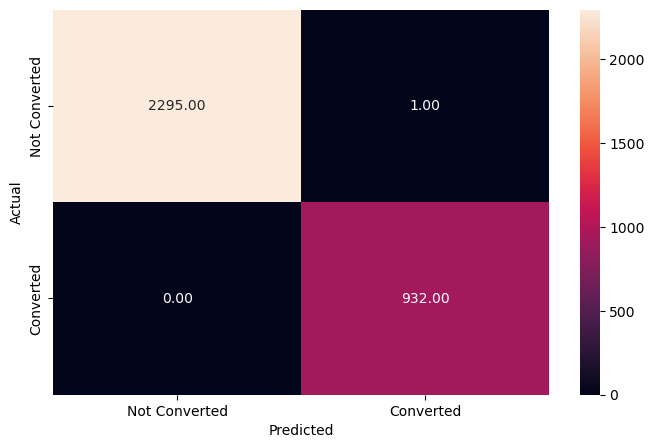

In [66]:
# Check the performance of the train dataset after pruned

y_train_pruned_pred_rf = rf_pruned.predict(X_train_pruned_rf)

metricscore(y_train_pruned_rf, y_train_pruned_pred_rf)

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       939
           1       0.80      0.70      0.75       445

    accuracy                           0.85      1384
   macro avg       0.83      0.81      0.82      1384
weighted avg       0.84      0.85      0.84      1384



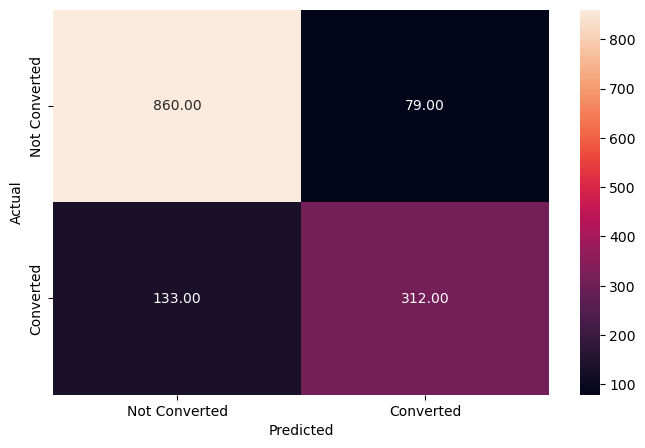

In [67]:
# Check the performance on the test dataset after pruned

y_test_pruned_pred_rf = rf_pruned.predict(X_test_pruned_rf)

metricscore(y_test_pruned_rf, y_test_pruned_pred_rf)

In [68]:
# Show Accuracy of Random Forest Classifier After Pruned

accuracy_rf_pruned = metrics.accuracy_score(y_test_pruned_rf, y_test_pruned_pred_rf) * 100

print("Accuracy: {:.2f}%".format(accuracy_rf_pruned))

Accuracy: 84.68%


### Observations:


In conclusion, the training set of the pruned Random Forest is also overfitting, similar to the Decision Tree's pruned model. The accuracy of the Random Forest model after it was pruned is 84.68%, where it was 85.26% before it was tuned and pruned, although the pruned model's result is slightly better than the tuned model as it increased from 83.02% when it was tuned, to 84.68% after it was tuned.

## Actionable Insights and Recommendations

## Conclusions:

### Decision Tree Modeling

#### Precision:

For "Not Converted" (class 0): Precision of 0.86.
For "Converted" (class 1): Precision of 0.70.
Precision represents the proportion of instances predicted as positive that are actually positive. In this context, it indicates the accuracy of the model in predicting conversions.

#### Recall (Sensitivity):

For "Not Converted" (class 0): Recall of 0.87.
For "Converted" (class 1): Recall of 0.69.
Recall measures the ability of the model to correctly identify all actual positive instances. In this context, it indicates how well the model captures all conversions.

#### F1-Score:

For "Not Converted" (class 0): F1-score of 0.87.
For "Converted" (class 1): F1-score of 0.70.
F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance.

#### Support:

962 instances of "Not Converted" (class 0).
422 instances of "Converted" (class 1).
Support represents the number of actual occurrences of each class in the test dataset.

#### Accuracy:

Overall accuracy of the model on the entire test dataset is 0.82 (82%).

#### Summary:

1. The model performs reasonably well with an accuracy of 82%, indicating that it correctly classifies instances approximately 82% of the time.
2. Precision and recall values provide insights into the model's ability to predict both classes. Precision is higher for "Not Converted," indicating a higher accuracy for predicting non-conversions. Recall is higher for "Not Converted," suggesting that the model captures more instances of non-conversions.
3. F1-scores provide a balanced assessment of precision and recall, with higher values indicating better overall performance.
4. The macro and weighted averages for precision, recall, and F1-score provide aggregate metrics, considering the class imbalance.





### Random Forest Modeling: 

#### Precision:

For "Not Converted" (class 0): Precision of 0.87.
For "Converted" (class 1): Precision of 0.80.
Precision represents the proportion of instances predicted as positive that are actually positive. In this context, it indicates the accuracy of the model in predicting conversions.

#### Recall (Sensitivity):

For "Not Converted" (class 0): Recall of 0.93.
For "Converted" (class 1): Recall of 0.69.
Recall measures the ability of the model to correctly identify all actual positive instances. In this context, it indicates how well the model captures all conversions.

#### F1-Score:

For "Not Converted" (class 0): F1-score of 0.90.
For "Converted" (class 1): F1-score of 0.74.
F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance.

#### Support:

962 instances of "Not Converted" (class 0).
422 instances of "Converted" (class 1).
Support represents the number of actual occurrences of each class in the test dataset.

#### Accuracy:

Overall accuracy of the model on the entire test dataset is 0.85 (85%).

#### Summary:

1. The random forest model demonstrates strong performance with an accuracy of 85%, indicating that it correctly classifies instances approximately 85% of the time.
2. Precision is high for both classes, suggesting a high level of accuracy in predicting both conversions and non-conversions.
3. Recall is particularly high for "Not Converted," indicating that the model effectively captures instances of non-conversions. However, the recall for "Converted" is lower, indicating that the model may miss some instances of conversions.
4. F1-scores provide a balanced assessment of precision and recall, with higher values indicating better overall performance.
5. The macro and weighted averages for precision, recall, and F1-score provide aggregate metrics, considering the class imbalance.



-------------------------------------------------------------------------------------------------------------------

### Summary: 

Unlike the decision tree, the random forest model gives some more importance to other variables such as current occupation, last activity, and page views per visit. This suggests that the random forest model has more impactful factors that can help to contribute towards the modeling in comparison to the decision tree model.

Although both training set data models (Decision Tree and Random Forest) do not result in overfitting after being tuned, however the overall results of the models' accuracy slightly decreased.

Looking at the impactful variables, based on the feature importances, we can conclude that the time spent on website, age, and profile completion are the most impactful factors coiming from both the decision tree as well as the random forest modeling. 

Using the original random forest model before tuned and pruned, which has a weighted average of 85% Recall score with decent precision and F1 scores, ExtraaLearn will be able to predict which leads will potentially convert to sales and which will not be converted to sales. Thus, with these results, they will be able to better market their products to potential leads that will convert to sales.

Overall, the random forest model generates a better quantitative result comparing to the decision tree model.



## Recommendations and Actionable Insights

1. The time spent on the website is an important role in identifying whether a lead will convert to sales or not. From these reults, it can be concluded that the more time a lead spends on the website, the higher chances that they are likely to convert to sales. Creating more interactive activity and actions on the website would generate more time spent on their website, and are more likely to not just browse their website but also interact with it (such as completing their profiles in order to create course purchases).
2. The website first interaction matters more compared to the Mobile App. It has a higher conversion rate as well. The interaction that works best is via Website with the 38.45% Interaction via Email has a conversion rate of about 30.33%, and interaction via phone only has a conversion rate of about 21.31%. Thus, ExtraaLearn is advised to develop and create better UI and UX design on the website, as well as spend more time and money in advertising their platform to more people in order to attract more potential leads.
3. Leads that filled out their profiles with more completion have higher chances of converting to sales as they had spent much time in completing them for a purpose. Having notifications as encouragements to finish completing their profiles will enhance their conversion from potential leads to paying customers.
4. Creating marketing strategies such as implementing discounts displayed in their website when they reach a certain point in completing their profiles, will encourage the leads to convert themselves from leads to sales.
5. The age of the potential leads has a significant impact on the conversion, as the older potential leads might have more resources (money) to create a purchase on the courses (conversion to sales). Most of the leads' current occupations are professionals. 56.72% of the leads are professionals, 31.25% are unemployeed, and 12.03% are students. Leads that are converted into paying customers (labeled as 1) are mostly from professionals and unemployed. The average age of the professionals is 49 and similarly, the average age of the unemployed is 50. Courses might be attractive for professionals as some financials might be covered by their organizations, while students with the average age of 21 might not have the capability to afford the courses. It is not a surprise to see that professionals have the highest conversion rate from leads to sales. Hence, it is better to market the courses to older adults who are professionals in order to attract better potential reach that will convert to sales.
6. The channel that has the highest leads comes from referrals, which have the highest conversion rate (67.74%) comparing to the rest of the sources as it has the highest conversion rate. So, it is better for ExtraaLearn to create referral promotions in order to attract more potential leads.